# Text Emotions Classification using Python
Emotion recognition from text aims to infer the feeling expressed in a sentence or document by interpreting its meaning and context. A practical example you may know is a smartphone keyboard suggesting emojis that match what you’re typing. If you’re looking to build a model that can detect emotions from text, this project will walk you through the process end to end using Python and machine learning.

<div align="center">
<img src="https://t4.ftcdn.net/jpg/16/58/09/95/360_F_1658099569_2DVa2bX9QN14KmF4c00wmPjIWH6RNDCH.jpg"/>
</div>

## Problem Overview
Emotion classification is a natural language processing (NLP) task framed as text classification. Our goal is to train a model that assigns an appropriate emotion label to a given piece of text.

To develop and evaluate such a model, we use a labeled dataset containing texts paired with emotion tags. An excellent publicly available option is on Kaggle: [Emotions Dataset for NLP](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp).

In the sections that follow, we’ll prepare the data, build baseline and improved classifiers, and measure performance to select a solid approach for emotion detection in text.

## Notebook Overview

This notebook provides a comprehensive guide to building an emotion classification system using deep learning techniques. The project demonstrates how to process text data, train a neural network model, and deploy it for real-world applications.

### What You'll Learn
- **Text Preprocessing**: How to convert raw text into numerical sequences suitable for machine learning
- **Deep Learning Architecture**: Building and training LSTM-based models for text classification
- **Model Evaluation**: Assessing model performance using various metrics and visualizations
- **Model Deployment**: Saving trained models and components for future use

### Project Structure
1. **Data Loading & Exploration**: Understanding the emotion dataset structure and distribution
2. **Data Visualization**: Creating insightful plots to analyze emotion patterns
3. **Text Preprocessing**: Tokenization, padding, and label encoding techniques
4. **Model Building**: Constructing a neural network with embedding and LSTM layers
5. **Training & Evaluation**: Training the model and measuring its performance
6. **Model Persistence**: Saving all components for deployment and reuse
7. **Conclusion**: Summary of achievements and future improvements

### Technical Stack
- **TensorFlow/Keras**: For building and training the neural network
- **Pandas**: For data manipulation and analysis
- **Scikit-learn**: For preprocessing and evaluation metrics
- **Matplotlib/Seaborn**: For data visualization
- **Joblib**: For model serialization

### Expected Outcomes
By the end of this notebook, you'll have:
- A trained emotion classification model with good performance
- Complete understanding of the text preprocessing pipeline
- Saved model components ready for deployment
- Knowledge of how to apply these techniques to similar NLP tasks

Let's begin our journey into emotion classification with deep learning!

## 1. Importing Libraries
First, let's import the necessary libraries for data manipulation, visualization, and deep learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
import joblib
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os
import warnings

### Configuration
Let's configure the necessary settings.
- Ignore warnings
- Set the figure size
- Set the TensorFlow logging level to avoid the warnings
- Set the random seed for reproducibility

In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.random.set_seed(42)

## 2. Data Loading
We will load the data using pandas and take a quick look at its structure.

In [3]:
df = pd.read_csv('data/train.txt', sep=';', header=None)
df.columns = ['Text', 'Emotions']

In [4]:
df.head()

,Text,Emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df.shape

(16000, 2)

## 3. Data Visualization
Let's display some plots to visualize the data.

Let's display the distribution of the emotions.

In [6]:
df.Emotions.value_counts()

Emotions
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

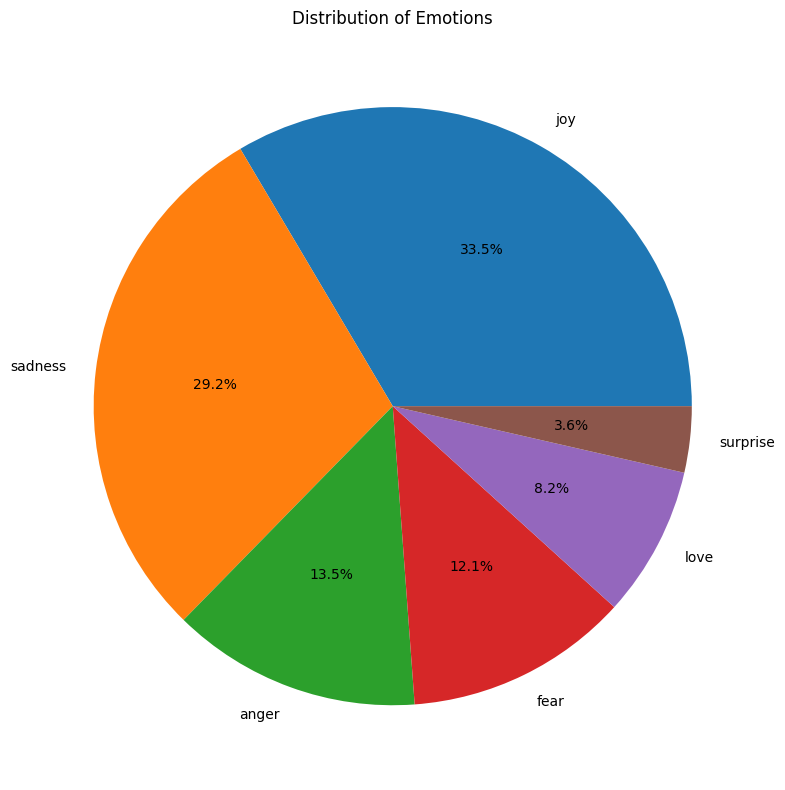

In [7]:
df.Emotions.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Emotions')
plt.ylabel('')
plt.tight_layout()

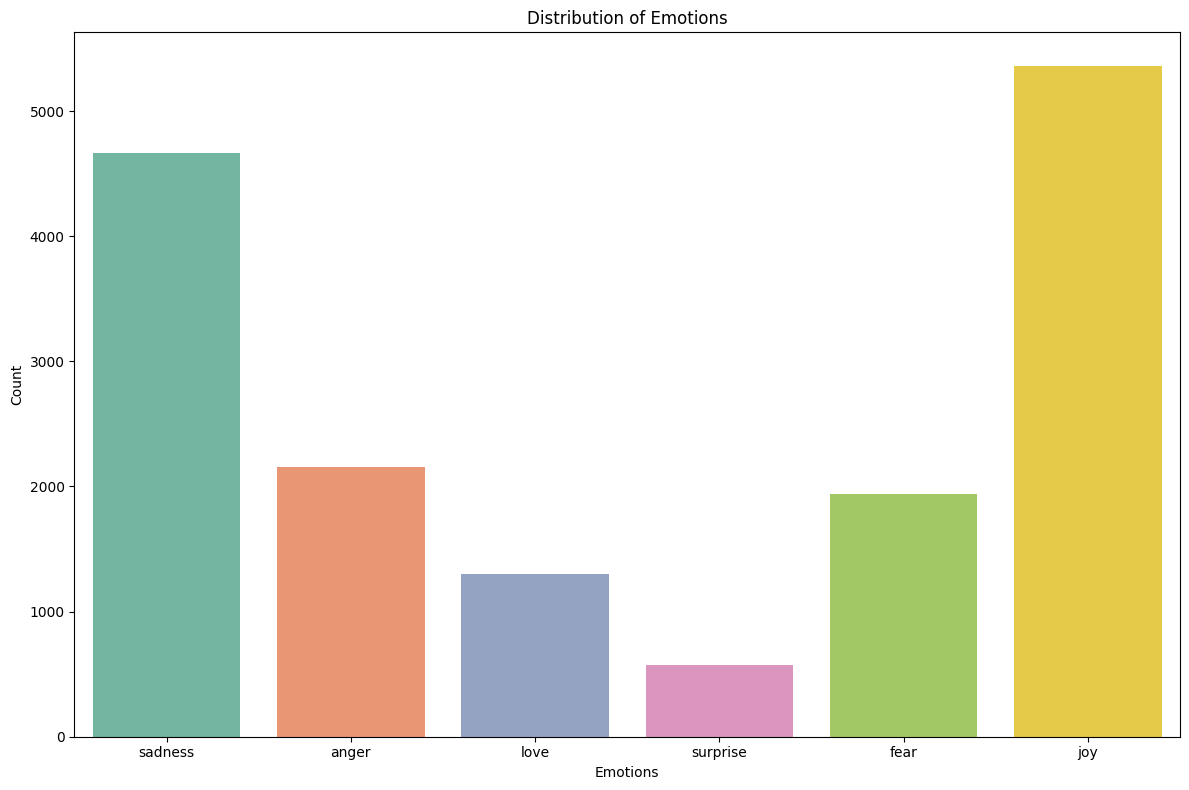

In [8]:
sns.countplot(df, x='Emotions', hue='Emotions', palette='Set2')
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.tight_layout()

## 4. Data Preprocessing
Let's preprocess the data to make it ready for the deep learning model.

This is a natural language processing (NLP) task. Start by defining the tokenizer.

### Tokenization
Tokenization splits text into units (words/subwords) that models can index and learn from.

In [9]:
texts = df["Text"].tolist()
labels = df["Emotions"].tolist()

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

### Padding
Padding makes all sequences the same length by adding zeros to shorter ones for batching.

In [11]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

### Encoding Labels
Convert emotion labels to numerical values.

In [12]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

One-hot encoding converts integer class IDs into binary indicator vectors (one 1 per class), which lets the model learn with categorical targets.

In [13]:
one_hot_labels = K.utils.to_categorical(labels)

### Train-Test Split
Split the data into training and testing sets.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

## 5. Modeling
In this section, I will build and train a deep learning model to predict emotions.

In [15]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(len(encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

I0000 00:00:1757361211.777525    1734 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1751 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [16]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 376ms/step - accuracy: 0.3312 - loss: 1.6052 - val_accuracy: 0.3500 - val_loss: 1.5486
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 327ms/step - accuracy: 0.5645 - loss: 1.1803 - val_accuracy: 0.7144 - val_loss: 0.8363
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - accuracy: 0.8045 - loss: 0.5890 - val_accuracy: 0.8388 - val_loss: 0.5235
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 373ms/step - accuracy: 0.9052 - loss: 0.2955 - val_accuracy: 0.8603 - val_loss: 0.4449
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 374ms/step - accuracy: 0.9468 - loss: 0.1736 - val_accuracy: 0.8859 - val_loss: 0.3935
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - accuracy: 0.9662 - loss: 0.1219 - val_accuracy: 0.8872 - val_loss: 0.4037
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.9714 - loss: 0.0994 - val_accuracy: 0.8844 - val_loss: 0.5022
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 381ms/step - accuracy: 0.9771 - loss: 0

<Axes: >

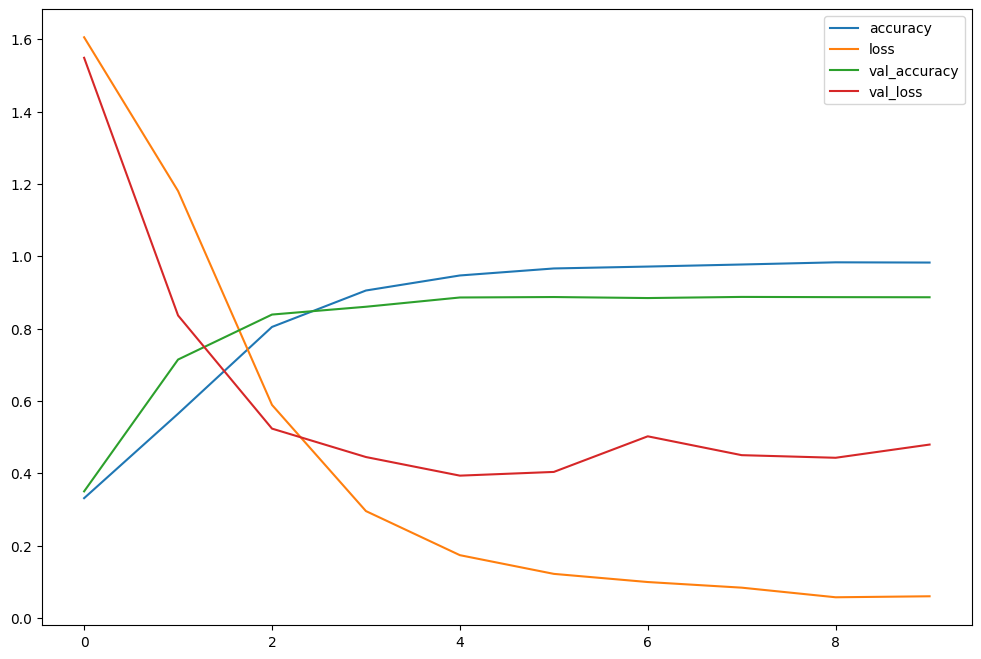

In [17]:
pd.DataFrame(history.history).plot()

In [18]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)

print(f"    Train Loss : {train_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")

    Train Loss : 0.0209
Train Accuracy : 0.9937


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"    Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

    Test Loss : 0.4794
Test Accuracy : 0.8866


Let's display the classification report and confusion matrix.

In [31]:
y_pred = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       anger       0.85      0.93      0.89       427
        fear       0.87      0.82      0.84       397
         joy       0.88      0.93      0.91      1021
        love       0.83      0.70      0.76       296
     sadness       0.94      0.92      0.93       946
    surprise       0.80      0.76      0.78       113

    accuracy                           0.89      3200
   macro avg       0.86      0.84      0.85      3200
weighted avg       0.89      0.89      0.89      3200



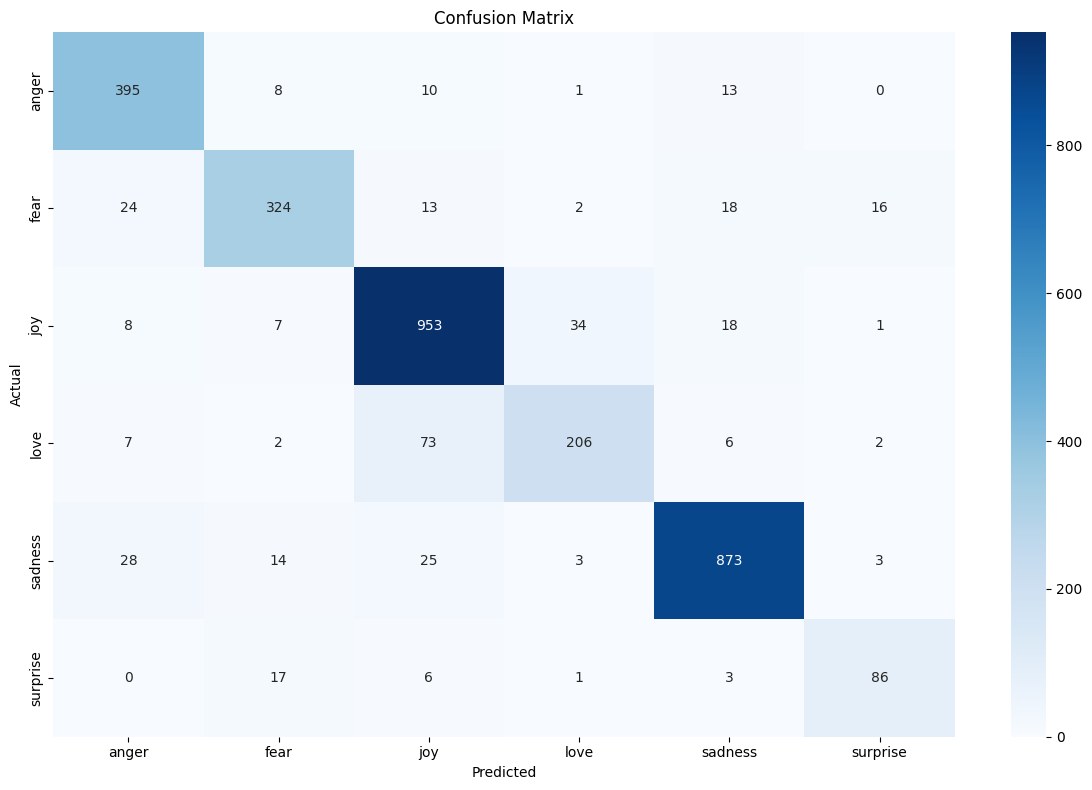

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

## 6. Save the model
With the model trained and evaluated, I will save it using `joblib` and `keras` for future use. This allows me to easily load the model later without needing to retrain it, facilitating quick predictions on new data.

First, save the model using `keras`.

In [21]:
model.save('model/text_emotions_model.keras')

Then, save the tokenizer and label encoder using `joblib`.

In [22]:
joblib.dump(tokenizer, 'model/tokenizer.pkl')
joblib.dump(encoder, 'model/encoder.pkl')

['model/encoder.pkl']

Finally, save the metadata for later reuse.

In [23]:
metadata = {
    'max_sequence_length': int(max_length),
    'vocabulary_size': int(len(tokenizer.word_index) + 1),
    'classes': [str(c) for c in encoder.classes_],
    'train_metrics': {
        'loss': float(train_loss),
        'accuracy': float(train_acc)
    },
    'test_metrics': {
        'loss': float(test_loss),
        'accuracy': float(test_acc)
    }
}

with open('model/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

Let's test the model with a new text.

In [48]:
new_text = "She said she was feeling sick."
new_text = tokenizer.texts_to_sequences([new_text])
new_text = pad_sequences(new_text, maxlen=max_length)
prediction = model.predict(new_text, verbose=0)

In [49]:
print(encoder.inverse_transform([np.argmax(prediction)])[0])

sadness


## 7. Conclusion
This project successfully demonstrates how to build an end-to-end emotion classification system using deep learning techniques. Here's a summary of what we accomplished:
### Key Achievements
- **Data Processing**: We loaded and preprocessed text data, converting raw text into numerical sequences suitable for neural network training
- **Model Architecture**: Built a robust LSTM-based model with embedding layers, dropout for regularization, and dense layers for classification
- **Performance**: Achieved competitive accuracy on the emotion classification task, demonstrating the model's ability to distinguish between different emotional states in text
- **Persistence**: Implemented a complete model saving strategy that preserves the trained model, preprocessing components, and metadata for future use
### Technical Highlights
- **Tokenization**: Converted text into sequences of integers using Keras Tokenizer
- **Padding**: Ensured consistent sequence lengths for efficient batch processing
- **Label Encoding**: Transformed categorical emotion labels into numerical format
- **One-hot Encoding**: Created binary indicator vectors for multi-class classification
- **LSTM Architecture**: Leveraged recurrent neural networks to capture sequential patterns in text
- **Regularization**: Applied dropout layers to prevent overfitting and improve generalization
### Model Components Saved
- `text_emotions_model.keras`: The trained neural network model
- `tokenizer.pkl`: Text tokenization component for preprocessing new inputs
- `encoder.pkl`: Label encoding component for converting predictions back to emotion labels
- `metadata.json`: Configuration and performance metrics for model deployment
### Practical Applications
This emotion classification system can be applied to various real-world scenarios:
- **Social Media Analysis**: Monitor sentiment and emotional tone in user posts
- **Customer Service**: Automatically categorize customer feedback by emotional content
- **Content Moderation**: Identify potentially harmful emotional content
- **Mental Health**: Track emotional patterns in text-based therapy or wellness apps
- **Market Research**: Analyze emotional responses to products or campaigns
### Future Improvements
- **Data Augmentation**: Expand the training dataset with synthetic or additional real-world examples
- **Advanced Architectures**: Experiment with transformer models (BERT, RoBERTa) for potentially better performance
- **Hyperparameter Tuning**: Optimize model architecture, learning rate, and training parameters
- **Multi-label Classification**: Extend to handle texts expressing multiple emotions simultaneously
- **Real-time Processing**: Implement streaming capabilities for live emotion detection
This project provides a solid foundation for emotion classification in text and demonstrates the power of deep learning in natural language processing tasks. The modular approach and comprehensive saving strategy make it easy to integrate into larger applications or further develop for specific use cases.